In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def get_gauss_prob(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2
def get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    p_class_1, p_class_2 = get_gauss_prob(data[['Peso', 'Altura']].values, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

N=-1
data = pd.read_csv('alturas-pesos-mils-train.csv')[:N]
test = pd.read_csv('alturas-pesos-mils-test.csv')
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

peso_altura_hombres = data.loc[data['Genero']=='Hombre'][['Peso', 'Altura']].values
peso_altura_mujeres = data.loc[data['Genero']=='Mujer'][['Peso', 'Altura']].values
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)
cov_LDA = np.cov(np.vstack([peso_altura_hombres - mean_hombres, peso_altura_mujeres - mean_mujeres]).T)

acc_train_LDA =  get_acc_gauss(data, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)
print("Accuracy Train =",acc_train_LDA)
acc_test_LDA = get_acc_gauss(test, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)
print("Accuracy Test =",acc_test_LDA)

Accuracy Train = 0.9167395924490561
Accuracy Test = 0.9225


Accuracy Train = 0.9167395924490561
Accuracy Test = 0.9225


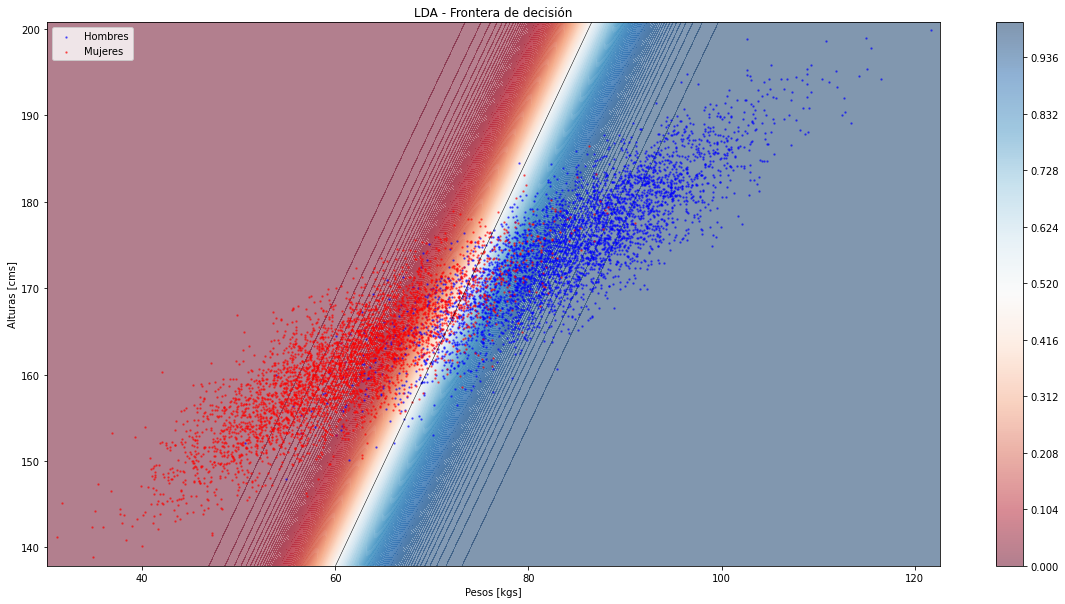

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

N = -1
data = pd.read_csv('alturas-pesos-mils-train.csv')[:N]
test = pd.read_csv('alturas-pesos-mils-test.csv')

X_train = data[['Peso', 'Altura']].values
y_train = (data['Genero'] == 'Hombre').astype(int)
X_test = test[['Peso', 'Altura']].values
y_test = (test['Genero'] == 'Hombre').astype(int)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

acc_train_LDA = accuracy_score(y_train, y_train_pred)
acc_test_LDA = accuracy_score(y_test, y_test_pred)

print("Accuracy Train =", acc_train_LDA)
print("Accuracy Test =", acc_test_LDA)


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z_lda = lda.predict_proba(np.column_stack([X.ravel(), Y.ravel()]))[:, 1].reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lda, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lda, (0.5,), colors='k', linewidths=0.5)  # Umbral de decisión en 0.5
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', s=2, alpha=0.5, label='Hombres')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', s=2, alpha=0.5, label='Mujeres')
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('LDA - Frontera de decisión')
plt.legend()
plt.show()


Se puede observar que los parámetros obtenidos son iguales, tanto el accuracy train como el accuracy test dan lo mismo.

Accuracy Train = 0.9157394674334292
Accuracy Test = 0.92


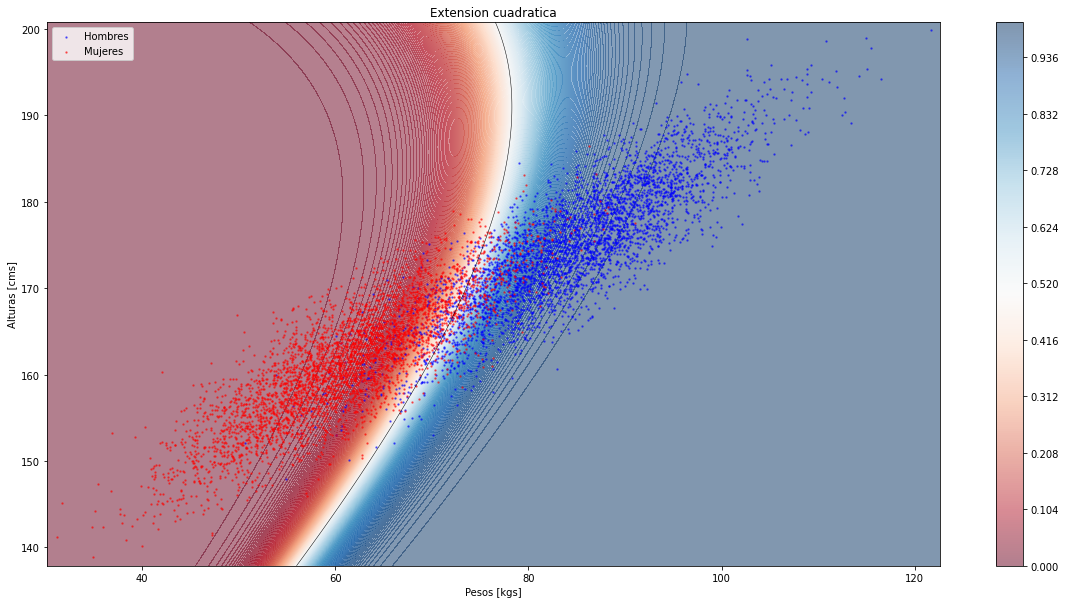

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

N = -1
data = pd.read_csv('alturas-pesos-mils-train.csv')[:N]
test = pd.read_csv('alturas-pesos-mils-test.csv')

p_train = data['Peso'].values  
a_train = data['Altura'].values
X_train = np.column_stack([p_train, p_train**2, a_train, a_train**2, p_train * a_train])
y_train = (data['Genero'] == 'Hombre').astype(int)

p_test = test['Peso'].values
a_test = test['Altura'].values
X_test = np.column_stack([p_test, p_test**2, a_test, a_test**2, p_test * a_test])
y_test = (test['Genero'] == 'Hombre').astype(int)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

acc_train_LDA = accuracy_score(y_train, y_train_pred)
acc_test_LDA = accuracy_score(y_test, y_test_pred)

print("Accuracy Train =", acc_train_LDA)
print("Accuracy Test =", acc_test_LDA)


x_min, x_max = p_train.min() - 1, p_train.max() + 1
y_min, y_max = a_train.min() - 1, a_train.max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

X_mesh = np.column_stack([X.ravel(), X.ravel()**2, Y.ravel(), Y.ravel()**2, X.ravel() * Y.ravel()])

Z_lda = lda.predict_proba(X_mesh)[:, 1].reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lda, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lda, (0.5,), colors='k', linewidths=0.5)  # Umbral de decisión en 0.5
plt.scatter(p_train[y_train == 1], a_train[y_train == 1], color='b', s=2, alpha=0.5, label='Hombres')
plt.scatter(p_train[y_train == 0], a_train[y_train == 0], color='r', s=2, alpha=0.5, label='Mujeres')
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Extension cuadratica')
plt.legend()
plt.show()


El umbral de decisión sigue siendo lineal?
No, se puede observar en los gráficos obtenidos como el umbral se curva con la extensión cuadrática.
Cuántos parámetros tiene el modelo ahora?
Para la extensión cuadrática, el modelo cuenta con 5 parámetros: p, p*2, a, a*2 y p*a.
Cuántos parámetros tenía antes?
El modelo bayesiano LDA tenía 2 parámetros: p y a.
Cómo dan las métricas de train y validación?
Para la extensión cuadrática el Accuracy Train = 0.9157394674334292 y el Accuracy Test = 0.92. Por otro lado, para el modelo LDA bayesiano se obtuvieron valores de Accuracy Train = 0.9167395924490561 y Accuracy Test = 0.9225. Podemos observar la diferencia que hay entre ambos modelos.

Accuracy Train = 0.9166145768221028
Accuracy Test = 0.922


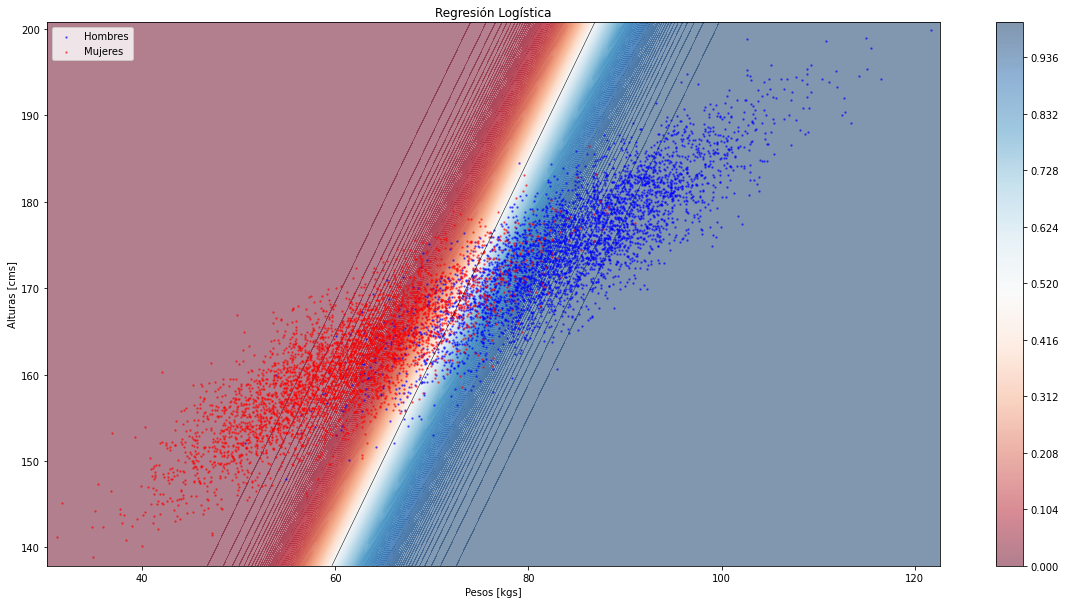

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

N = -1
data = pd.read_csv('alturas-pesos-mils-train.csv')[:N]
test = pd.read_csv('alturas-pesos-mils-test.csv')

p_train = data['Peso'].values
a_train = data['Altura'].values
X_train = np.column_stack([p_train, a_train])
y_train = (data['Genero'] == 'Hombre').astype(int)

p_test = test['Peso'].values
a_test = test['Altura'].values
X_test = np.column_stack([p_test, a_test])
y_test = (test['Genero'] == 'Hombre').astype(int)

logreg = LogisticRegression(C=1e12, solver='lbfgs')
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

acc_train_logreg = accuracy_score(y_train, y_train_pred)
acc_test_logreg = accuracy_score(y_test, y_test_pred)

print("Accuracy Train =", acc_train_logreg)
print("Accuracy Test =", acc_test_logreg)


x_min, x_max = p_train.min() - 1, p_train.max() + 1
y_min, y_max = a_train.min() - 1, a_train.max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

X_mesh = np.column_stack([X.ravel(), Y.ravel()])

Z_lr = logreg.predict_proba(X_mesh)[:, 1].reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)  # Umbral de decisión en 0.5
plt.scatter(p_train[y_train == 1], a_train[y_train == 1], color='b', s=2, alpha=0.5, label='Hombres')
plt.scatter(p_train[y_train == 0], a_train[y_train == 0], color='r', s=2, alpha=0.5, label='Mujeres')
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Regresión Logística')
plt.legend()
plt.show()
